# Exploratory Data Analysis - Home Credit Default Risk Project

## Harichandana Gonuguntla ( U1448647 )

## Table of contents:

1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Data-Retrieval">Data Retrieval</a>
3. <a href="#3.-Data-Examination">Data Examination</a>
4. <a href="#4.-Target-variable-Exploration">Target variable Exploration</a>
5. <a href="#5.-Handling-missing-data">Handling missing data</a>
6. <a href="#6.-Joining-datasets">Joining datasets</a>
7. <a href="#7.-Results-Interpretation-of-findings">Results-Interpretation of findings</a>

## 1. Introduction

- **Project Goal**:
    The goal of the Home Credit Default Risk Kaggle project is to develop predictive models that accurately assess the 
    credit default risk of loan applicants. Specifically, the project aims to predict whether a loan applicant is likely to
    default on their loan, with the broader objective of improving responsible lending practices and financial inclusion
    for individuals with limited or no credit history.
    
    
- **Business Problems**:

    *Credit Risk Assessment*: Home Credit Group faces the challenge of evaluating the creditworthiness of loan applicants who may not have a traditional credit history. Accurate assessment of credit risk is crucial to minimize loan defaults and associated financial losses.

    *Financial Inclusion*: The project seeks to address the problem of financial exclusion by providing loans to individuals who are often underserved by traditional lenders. It aims to offer a positive borrowing experience to those with limited access to credit.
    
    
- **Analytic Problems**:

    *Prediction of Loan Defaults*: The primary analytical problem is to build predictive models that can effectively predict whether a loan applicant is likely to default on their loan. This involves analyzing historical data to identify patterns and features that are indicative of default.

    *Data Preprocessing*: Dealing with missing values, outliers, and transforming the data into a suitable format for modeling is an essential part of the analysis.

    *Feature Engineering*: Identifying and creating relevant features that contribute to the prediction of loan defaults. This may involve exploring interactions between variables and deriving meaningful features from the available data.
    
    
- **Purpose of EDA**:
    Data Understanding, Feature Exploration, Data Quality Assessment, Hypothesis Generation
    
    
- **Questions to Explore in the EDA Notebook**:

    - What is the distribution of the target variable "TARGET" (loan default) in the dataset? Is it imbalanced?
    - What are the characteristics of the loan applicants in terms of age, gender, and other demographics etc?
    - How are features such as income, education, and housing related to loan default?
    - Are there any correlations between numeric features and the target variable?
    - What is the prevalence of missing values in the dataset, and how should missing data be handled?
    - Are there any outliers in the data that may need to be addressed during data preprocessing?
    - What additional features or data transformations might be useful for building predictive models?

## 2. Data Retrieval

In [303]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [304]:
path = '/Users/u1448647/Desktop/Capstone-1/home-credit-default-risk/'

In [305]:
# Loading the input datasets
application_train = pd.read_csv(path+"application_train.csv")
application_test = pd.read_csv(path+"application_test.csv")
bureau = pd.read_csv(path+"bureau.csv")
bureau_balance = pd.read_csv(path+"bureau_balance.csv")
credit_card_balance = pd.read_csv(path+"credit_card_balance.csv")
installments_payments = pd.read_csv(path+"installments_payments.csv")
previous_application = pd.read_csv(path+"previous_application.csv")
POS_CASH_balance = pd.read_csv(path+"POS_CASH_balance.csv")

## 3. Data Examination

The Home Credit dataset is derived from a real-world scenario and has been made available by Home Credit. This dataset encompasses multiple tables with a vast amount of information, including details about loan applicants, applicants' credit scores, and their historical repayment records. The primary objective of this dataset is to develop a predictive model capable of accurately assessing the probability of loan default for new applicants.

### Application train data set overview

In [306]:
#Checking first few rows of data using head()
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
#Checking the count of rows and columns
application_train.shape

(307511, 122)

In [308]:
#Checking the data types in the dataframe
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [309]:
#Checking the column names
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

**Application train|test data** table has the key details about loan applicants. Each column in the table contains information about the applicant's financial situation, credit history, and other factors. Each row represents a single loan application

### Application test dataset overview

In [310]:
#Checking first few rows of data using head()
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
#Checking the count of rows and columns
application_test.shape

(48744, 121)

In [312]:
#Checking the data types in the dataframe
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [313]:
#Checking the column names
application_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

**Application train|test data** has the key details about loan applicants. Each column in the table contains information about the applicant's financial situation, credit history, and other factors. Each row represents a single loan application

### Bureau Balance dataset overview

In [314]:
#Checking first few rows of data using head()
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [315]:
#Checking the count of rows and columns
bureau_balance.shape

(27299925, 3)

In [316]:
#Checking the data types in the dataframe
bureau_balance.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [317]:
#Checking the column names
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

**Bureau balance data** has Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (loans in sample of relative previous credits of months where we have some history observable for the previous credits) rows

### Bureau dataset overview

In [318]:
#Checking first few rows of data using head()
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [319]:
#Checking the count of rows and columns
bureau.shape

(1716428, 17)

In [320]:
#Checking the data types in the dataframe
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [321]:
#Checking the column names
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

**Bureau data** has all client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

### Creditcard balance dataset overview

In [322]:
#Checking first few rows of data using head()
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [323]:
#Checking the count of rows and columns
credit_card_balance.shape

(3840312, 23)

In [324]:
#Checking the data types in the dataframe
credit_card_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [325]:
#Checking the column names
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

**Credit card balance data** has monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

### Installment payments dataset overview

In [326]:
#Checking first few rows of data using head()
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [327]:
#Checking the count of rows and columns
installments_payments.shape

(13605401, 8)

In [328]:
#Checking the data types in the dataframe
installments_payments.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [329]:
#Checking the column names
installments_payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

**Installments payments data** has repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.There is one row for every payment that was made plus one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

### POS_CASH_balance dataset overview

In [330]:
#Checking first few rows of data using head()
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [331]:
#Checking the count of rows and columns
POS_CASH_balance.shape

(10001358, 8)

In [332]:
#Checking the data types in the dataframe
POS_CASH_balance.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [333]:
#Checking the column names
POS_CASH_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

**POSH cash balance data** has monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (loans in sample of relative previous credits of months in which we have some history observable for the previous credits) rows.

### Previous application dataset overview

In [334]:
#Checking first few rows of data using head()
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
#Checking the count of rows and columns
previous_application.shape

(1670214, 37)

In [336]:
#Checking the data types in the dataframe
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [337]:
#Checking the column names
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

**Previous application data** has all previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

## 4.Target variable Exploration

In [338]:
#Examine the counts of target variable 
vcounts = application_train["TARGET"].value_counts()
target_count = pd.DataFrame({'labels': vcounts.index,
                            'values': vcounts.values})
target_count

,labels,values
0,0,282686
1,1,24825


The code counts the occurrences of each unique value in the "TARGET" column of the "application_train" DataFrame, representing the count of loan defaults (1) and non-defaults (0), and then creates a DataFrame, "target_count," to display these counts along with their corresponding labels.

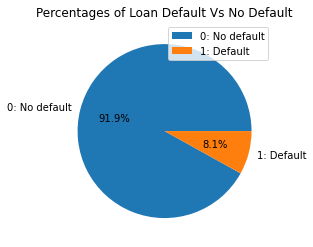

In [339]:
#Pie chart examination of the target variable distribution
default = ["0: No default", "1: Default"]
plt.pie(vcounts, labels =default, autopct='%1.1f%%')
plt.title("Percentages of Loan Default Vs No Default")
plt.legend()
plt.show()

The data is unbalanced because the number of samples in class "0" is much larger than the number of samples in class "1." In this case, class "0" represents the non-default or successful loans, and class "1" represents loan defaults.

### Code Gender, Family status, No.of children, Income type, Occupation type, Education type, Name Housing type,Days Birth analysis

In [340]:
#Defining a function to plot the distribution of target variable with respect to different input feature variables
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

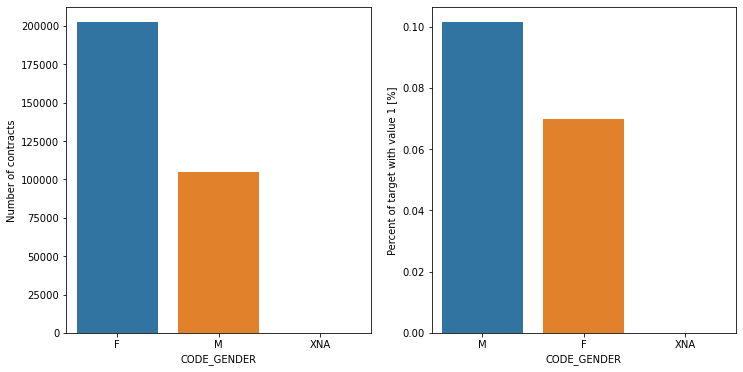

In [341]:
plot_stats('CODE_GENDER')

The number of female clients is almost double the number of male clients. Looking at the percent of defaulted credits,   males have a higher chance of not returning their loans(10%) when compared with women(7%)

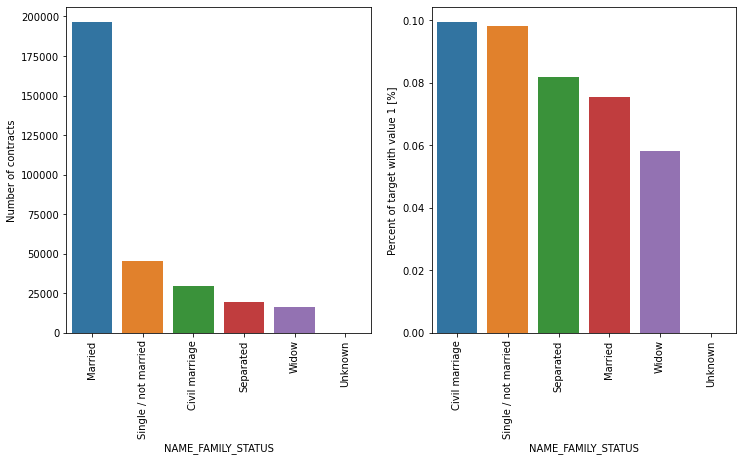

In [342]:
plot_stats('NAME_FAMILY_STATUS',True,True)

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

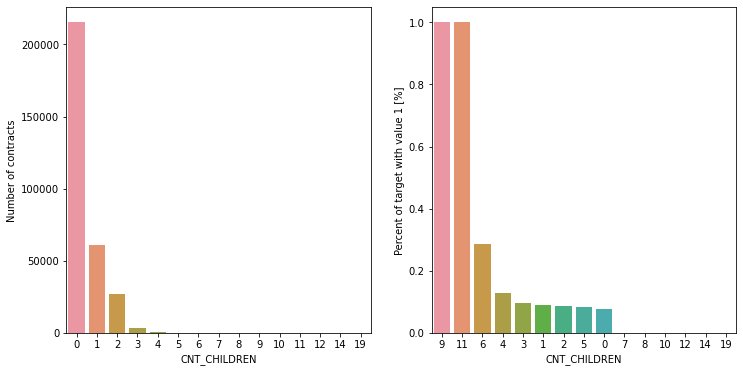

In [343]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

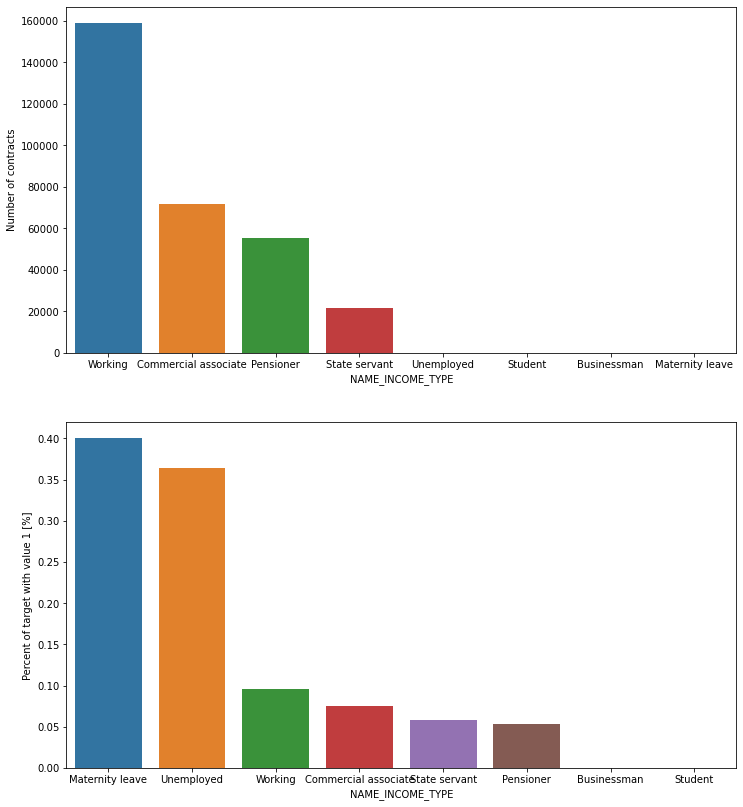

In [344]:
plot_stats('NAME_INCOME_TYPE',False,False)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

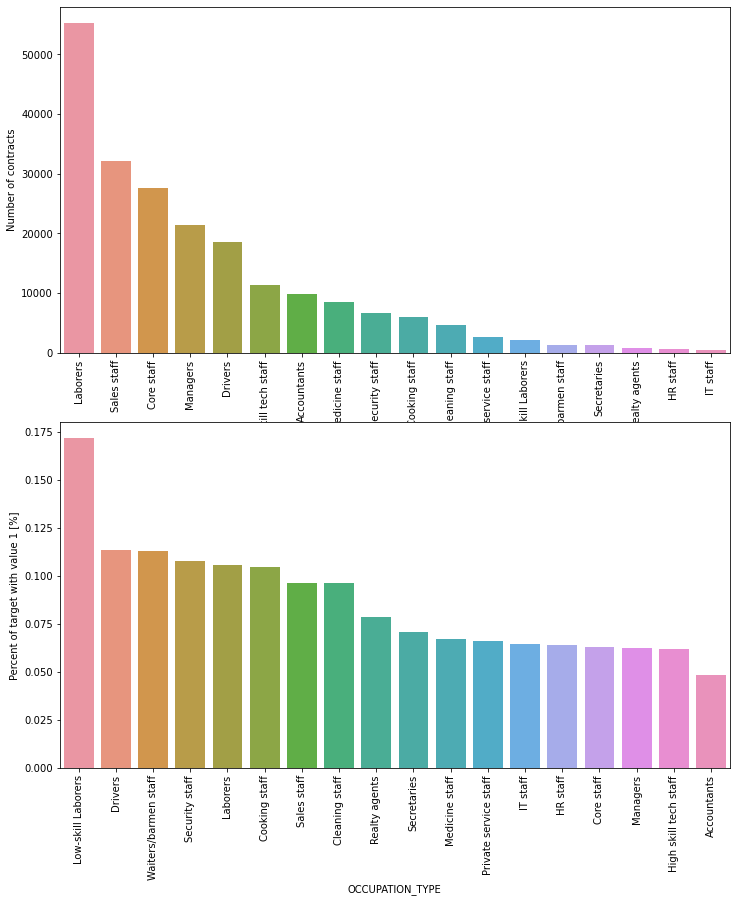

In [345]:
plot_stats('OCCUPATION_TYPE',True,False)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

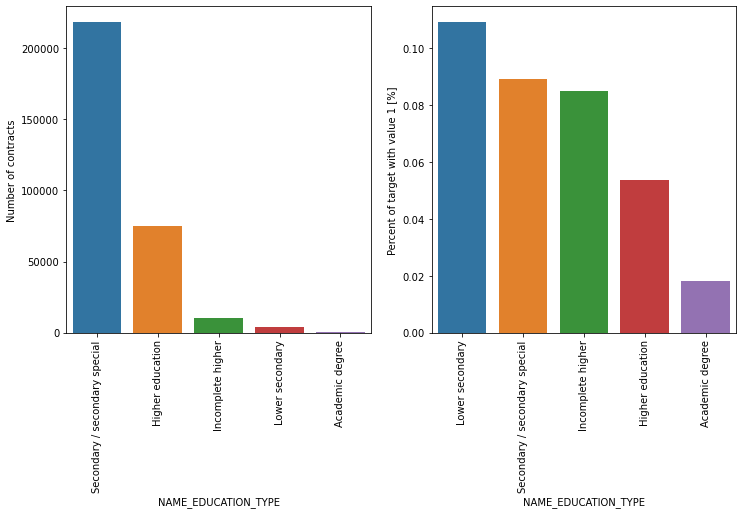

In [346]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

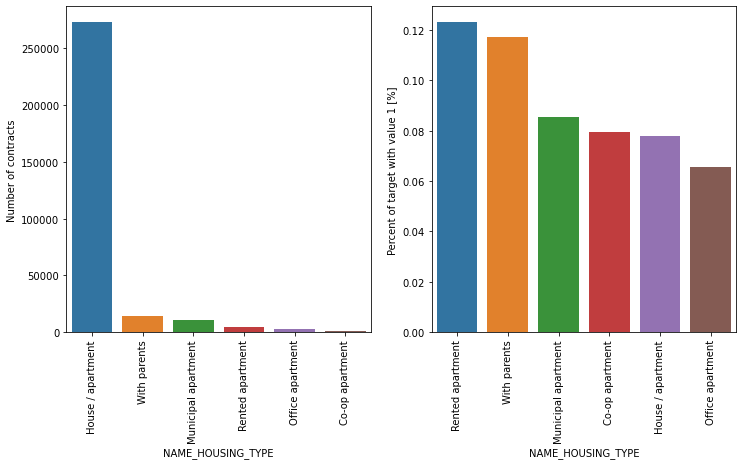

In [347]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

In [348]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

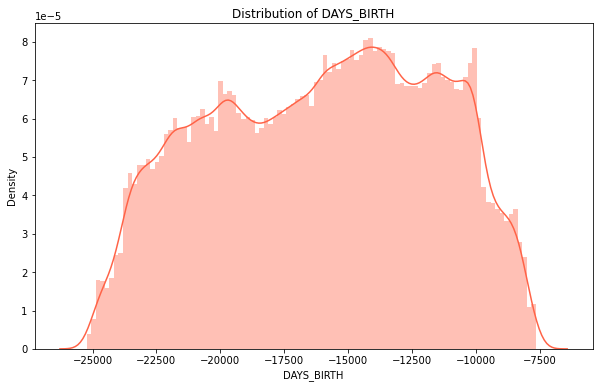

In [349]:
plot_distribution('DAYS_BIRTH','tomato')

The birth date is in the past if the value is negative. The age range lies about between 20 and 68.

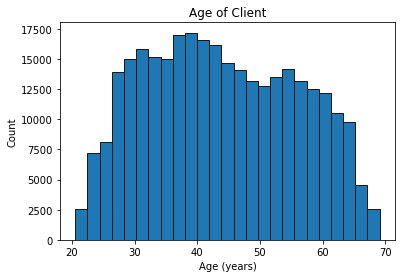

In [350]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

There are no outliers as all the ages are reasonable. Now we will visualize the effect of age on the target

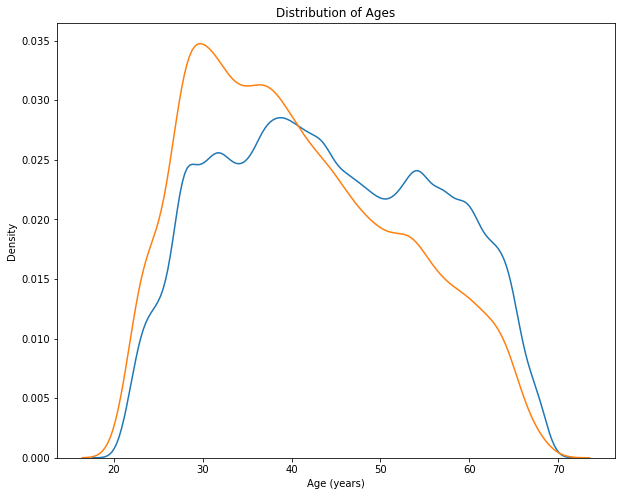

In [351]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve leans more toward the lower age range. Although the correlation is low (-0.07), this variable will probably be helpful in a machine learning model because it has an impact on the target.

Younger applicants are more likely to default on the loan, showing a definite trend. This knowledge might be put to practical use by the bank: since younger customers are less likely to repay the loan, perhaps more advice or financial planning advice should be given to them. This does not imply that the bank should treat younger customers differently, but it would be wise to take precautions to ensure that they make timely payments.

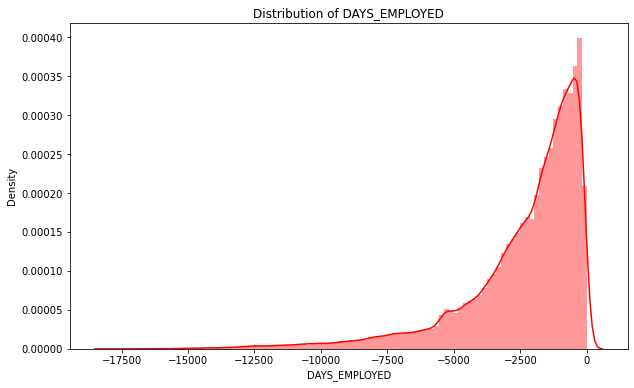

In [352]:
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

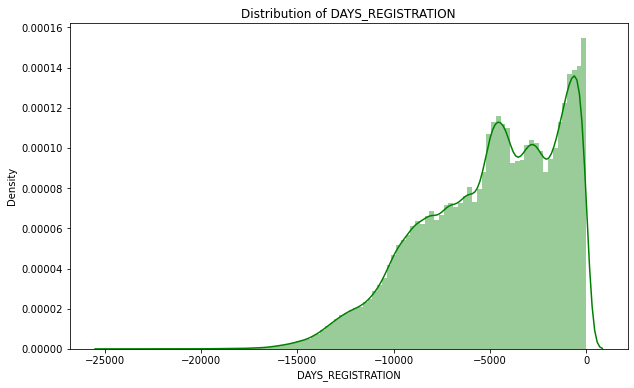

In [353]:
plot_distribution('DAYS_REGISTRATION','green')

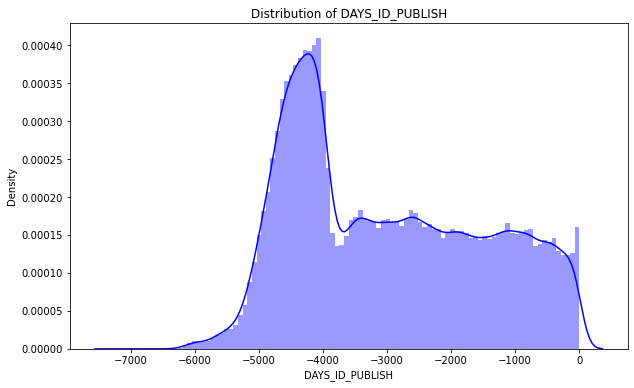

In [354]:
plot_distribution('DAYS_ID_PUBLISH','blue')

## Correlation

In [355]:
#Examining the correlation of input variables with respect to TARGET
correlations = application_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library

In [356]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = application_train.corr().abs()
#corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

#Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 34 columns to remove.


#### There are 34 columns to remove.

In [357]:
#List of columns to be dropped
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [358]:
to_drop = ['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [359]:
print('Training shape: ', application_train.shape)
application_train = application_train.drop(columns = to_drop)
print('New Training shape: ', application_train.shape)

Training shape:  (307511, 122)
New Training shape:  (307511, 87)


### Outliers

In [360]:
# Finding the outliers in each feature
overview = []

for col in application_train.columns:

    # Check for outliers with assumption of normal distribution
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    overview.append(outliers)

# Create a DataFrame from the overview list
overview_df = pd.DataFrame({'Column': application_train.columns, 'Outliers': overview})

# Print the DataFrame
overview_df


,Column,Outliers
0,SK_ID_CURR,0
1,TARGET,24825
2,NAME_CONTRACT_TYPE,N/A
3,CODE_GENDER,N/A
4,FLAG_OWN_CAR,N/A
...,...,...
82,AMT_REQ_CREDIT_BUREAU_DAY,1489
83,AMT_REQ_CREDIT_BUREAU_WEEK,8536
84,AMT_REQ_CREDIT_BUREAU_MON,3235
85,AMT_REQ_CREDIT_BUREAU_QRT,2301


## 5. Handling missing data

<AxesSubplot:>

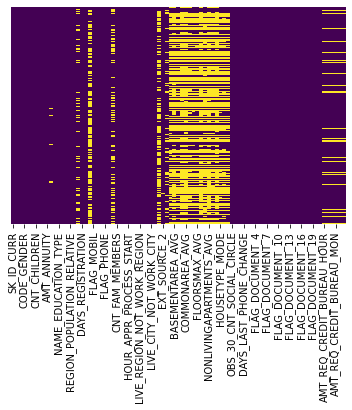

In [361]:
sns.heatmap(application_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [362]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [363]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(40)

Your selected dataframe has 87 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2


In [364]:
application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

## Categorical variables

In [365]:
#Finding the categorical variables
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

## Numerical variables

In [366]:
#Finding the numeric variables
numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

### Imputing the missing values in numerical variables with median

In [367]:
# Impute missing values with the median for numeric columns
for column in numeric_vars:
    median_value = application_train[column].median()
    application_train[column].fillna(median_value, inplace=True)

### Imputing the missing values in categorical variables with mode

In [368]:
#Finding the mode
print(application_train['NAME_TYPE_SUITE'].mode())

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [369]:
#Imputing with NA values of Name type suite with mode
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [370]:
#Finding the mode
print(application_train['OCCUPATION_TYPE'].mode())

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [371]:
#Imputing with NA values of Occupation type with mode
application_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [372]:
#Finding the mode
print(application_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object


In [373]:
#Imputing with NA values of Fondkapremont with mode
application_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [374]:
#Finding the mode
print(application_train['HOUSETYPE_MODE'].mode())

0    block of flats
Name: HOUSETYPE_MODE, dtype: object


In [375]:
#Imputing with NA values of Housetype with mode
application_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [376]:
#Finding the mode
print(application_train['WALLSMATERIAL_MODE'].mode())

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object


In [377]:
#Imputing with NA values of Wallsmaterial with mode
application_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [378]:
#Finding the mode
print(application_train['EMERGENCYSTATE_MODE'].mode()) 

0    No
Name: EMERGENCYSTATE_MODE, dtype: object


In [379]:
#Imputing with NA values of Emergency state with mode
application_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

#### Checking for missing values count after imputation

In [380]:
application_train.isnull().sum().sum()

0

In [381]:
application_train.shape

(307511, 87)

## 6. Joining datasets

### Joining Train data with bureau data

In [382]:
# Joining the application_train dataset with bureau dataset
train_bureau_merged = pd.merge(application_train, bureau, on="SK_ID_CURR")
train_bureau_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [383]:
#Grouping the merged data by SK_ID_CURR and aggregating to find the mean
aggregated_data = train_bureau_merged.groupby('SK_ID_CURR').agg('mean').reset_index()
aggregated_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1.0,0.0,202500.0,406597.5,24700.5,0.018801,9461.0,-637.0,-3648.0,...,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0.0,0.0,270000.0,1293502.5,35698.5,0.003541,16765.0,-1188.0,-1186.0,...,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0.0,0.0,67500.0,135000.0,6750.0,0.010032,19046.0,-225.0,-4260.0,...,-488.500000,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100007,0.0,0.0,121500.0,513000.0,21865.5,0.028663,19932.0,-3038.0,-4311.0,...,-783.000000,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN
4,100008,0.0,0.0,99000.0,490495.5,27517.5,0.035792,16941.0,-1588.0,-4970.0,...,-391.333333,-909.000000,0.000,0.0,156148.500000,80019.0,0.00000,0.0,-611.000,NaN


In [384]:
correlation_merge = train_bureau_merged.corr()
corr_target = correlation_merge["TARGET"].sort_values(ascending=False)
corr_target.head(30)

TARGET                        1.000000
DAYS_CREDIT                   0.061556
DAYS_EMPLOYED                 0.057902
REGION_RATING_CLIENT          0.048372
DAYS_ID_PUBLISH               0.042199
DAYS_LAST_PHONE_CHANGE        0.041996
DAYS_CREDIT_UPDATE            0.041076
REG_CITY_NOT_WORK_CITY        0.039903
FLAG_DOCUMENT_3               0.039643
DAYS_ENDDATE_FACT             0.039057
REG_CITY_NOT_LIVE_CITY        0.036047
DAYS_REGISTRATION             0.032541
DAYS_CREDIT_ENDDATE           0.026497
DEF_30_CNT_SOCIAL_CIRCLE      0.026449
LIVE_CITY_NOT_WORK_CITY       0.026302
AMT_REQ_CREDIT_BUREAU_YEAR    0.025900
DEF_60_CNT_SOCIAL_CIRCLE      0.024256
FLAG_WORK_PHONE               0.020287
CNT_CHILDREN                  0.016731
OWN_CAR_AGE                   0.015930
CNT_FAM_MEMBERS               0.013424
OBS_30_CNT_SOCIAL_CIRCLE      0.012540
AMT_CREDIT_SUM_OVERDUE        0.006253
FLAG_DOCUMENT_21              0.005494
FLAG_EMAIL                    0.005211
AMT_REQ_CREDIT_BUREAU_DAY

The correlation between "TARGET" and "DAYS_CREDIT" is approximately 0.0616. This positive correlation suggests that there is a weak positive relationship between the "DAYS_CREDIT" variable (which likely represents the number of days since the last credit inquiry) and the "TARGET" variable (which may represent loan default). In simpler terms, as the number of days since the last credit inquiry increases, there is a slightly higher chance of loan default. However, the correlation is relatively weak, indicating that "DAYS_CREDIT" alone is not a strong predictor of loan default.

## 7. Results-Interpretation of findings

### Data abundance

- When working with large datasets which contain numerous columns of data, it's essential to adopt an efficient modeling approach. This involves several steps to streamline the data:

    1. **Handling Null Values**: Some columns have a high number of missing or null values. These columns can be dropped from consideration as they don't provide meaningful information.

    2. **Identifying Insignificant Features**: There are columns that do not significantly contribute to building a predictive model. These can also be removed to reduce complexity.

### Data Scope

- From the distribution of Target variable, one thing that we can quickly notice is the Data Imbalance. There are only 8.07% of the total loans that had actually been Defaulted. This means that Defaulters is the minority class.
On the other hand, there are 91.9% loans which were not Defaulted. Thus, Non-Defaulters will be our majority class.
The Defaulters have been assigned a Target variable of 1 and Non-Defaulters have been assigned Target Variable 0.
For imbalanced dataset, during building the model, we cannot feed the data as is to some algorithms, which are imbalance sensitive.

### Findings

- Males have a higher chance of not returning their loans (10%), comparing with women (7%)
- Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown)
- Clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).As for clients with 9 or 11 children, the percent of loans not repaid is 100%.
- Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
- Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

### Next Steps

- To complete the data cleaning process before moving on to model construction, we must eliminate any unnecessary columns and decide how to handle any potentially relevant columns with a high proportion of null, inaccurate, or outlying data points. We must be careful to limit the time we spend on this data cleaning to situations where the data will really be used in our model.
- Then, we'll analyze which of several fundamental models that we've run through with the industry's leading techniques is producing the most encouraging outcomes. The data we will use to train the model and the kind of model we will use can then be decided upon.
- Here are the 5 main steps to follow after completing the Exploratory Data Analysis (EDA) phase in the Kaggle Home Credit Default Risk project using the CRISP-DM framework - Data Preparation, Feature Engineering, Model Development, Model Evaluation and Model Deployment
